Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [1]:
import pandas as pn
import numpy as np
import matplotlib as ml
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()


In [4]:
data = boston['data']
data.shape

(506, 13)

In [5]:
feature_names = boston["feature_names"]
target = boston['target']

In [6]:
X = pn.DataFrame(data, columns=feature_names)
y = pn.DataFrame(target, columns=["price"])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.2 ,random_state = 42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train_scaled = pn.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pn.DataFrame(scaler.transform(X_test), columns=X_test.columns)

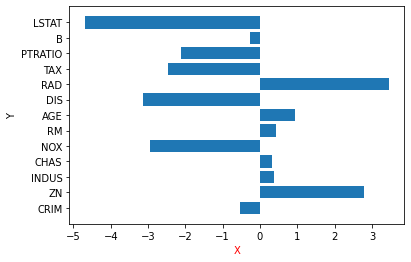

In [27]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(102, 13)
После:	(102, 2)


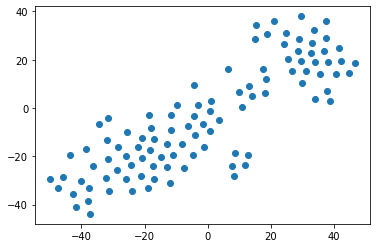

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

2.С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах


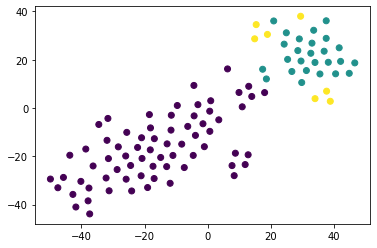

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,max_iter = 100, random_state = 42)
train = model.fit_predict(X_train)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = train)
plt.show()

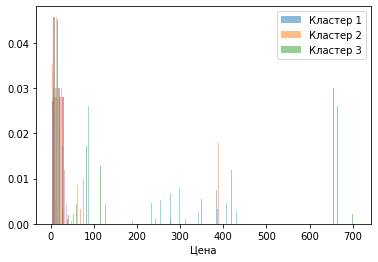

In [16]:
plt.hist(X_train[train == 0], bins=20, density=True, alpha=0.5)
plt.hist(X_train[train == 1], bins=20, density=True, alpha=0.5)
plt.hist(X_train[train == 2], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 1', 'Кластер 2','Кластер 3'])
plt.xlabel('Цена')
plt.show()

In [17]:
print('Кластер 1: {}'.format(X_train.loc[train == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_train.loc[train == 2, 'CRIM'].mean()))

Кластер 1: 0.24642115942028991
Кластер 2: 8.469301923076923
Кластер 3: 19.021665714285714


In [57]:
print('Кластер 1: {}'.format(y_train.loc[train == 0, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[train == 1, 'price'].mean()))
print('Кластер 3: {}'.format(y_train.loc[train == 2, 'price'].mean()))

Кластер 1: 23.91159420289855
Кластер 2: 17.392307692307693
Кластер 3: 12.814285714285713


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [29]:
test = model.fit_predict(X_test)
X_test_tsne = tsne.fit_transform(X_test_scaled)

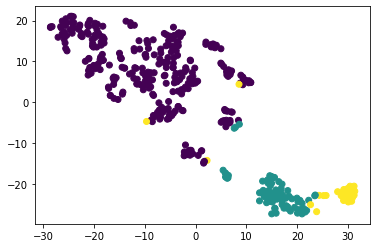

In [30]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = test)
plt.show()

In [31]:
print('Кластер 1: {}'.format(X_test.loc[test == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_test.loc[test == 2, 'CRIM'].mean()))

Кластер 1: 0.40486282828282827
Кластер 2: 11.745661842105262
Кластер 3: 14.360380322580646


In [53]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   404 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


In [56]:
print('Кластер 1: {}'.format(y_test.loc[test == 0, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[test == 1, 'price'].mean()))
print('Кластер 3: {}'.format(y_test.loc[test == 2, 'price'].mean()))

Кластер 1: 25.16868686868687
Кластер 2: 17.442105263157895
Кластер 3: 13.196774193548388
